Tai bo phat hien doi tuong cua tf2

In [8]:
!git clone https://github.com/tensorflow/models.git

Cloning into 'models'...
remote: Enumerating objects: 86752, done.
remote: Counting objects: 100% (506/506), done.
remote: Compressing objects: 100% (254/254), done.
remote: Total 86752 (delta 263), reused 476 (delta 246), pack-reused 86246
Receiving objects: 100% (86752/86752), 598.90 MiB | 8.93 MiB/s, done.
Resolving deltas: 100% (62137/62137), done.
Updating files: 100% (3558/3558), done.


# Thiet lap chuong trinh tren moi truong myai

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import os
import random
import io
import imageio
import glob
import scipy.misc
import numpy as np
from six import BytesIO
from PIL import Image, ImageDraw, ImageFont
from IPython.display import display, Javascript
from IPython.display import Image as IPyImage

import tensorflow as tf
# from google.colab import files
import pathlib
import itertools
import random

from object_detection.utils import ops as utils_ops
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils

from object_detection.utils import config_util
# from object_detection.utils import colab_utils
from object_detection.builders import model_builder
%matplotlib inline

2023-07-25 23:19:54.264511: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/skm/anaconda3/envs/myai/lib/python3.9/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/home/skm/anaconda3/envs/myai/lib/python3.9/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/home/skm/anaconda3/envs/myai/lib/python3.9/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6Status12empty_stringB5cxx11Ev']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/home/skm/anaconda3/envs/myai/lib/python3.9/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/home/skm/anaconda3/envs/myai/lib/python3.9/site-packages/tensorflow_io/python/ops/libt

### Tai pretrain model vao dung cho dam bao jupyter dang o dung diem

In [179]:
import os
dir_pretrain = '/home/skm/SKM16/IMAGE/ZZ_ZZ/TauBien/code/Try/SSD/pretrain_model'
link_pretrain_model = "http://download.tensorflow.org/models/object_detection/tf2/20200711/faster_rcnn_resnet152_v1_800x1333_coco17_gpu-8.tar.gz"

os.makedirs(dir_pretrain, exist_ok=True)

%cd /home/skm/SKM16/IMAGE/ZZ_ZZ/TauBien/code/Try/SSD/pretrain_model
!pwd

/home/skm/SKM16/IMAGE/ZZ_ZZ/TauBien/code/Try/SSD/pretrain_model
/home/skm/SKM16/IMAGE/ZZ_ZZ/TauBien/code/Try/SSD/pretrain_model


In [177]:
import os
name_model = os.path.basename(link_pretrain_model)
file_will_download = os.path.join(dir_pretrain, name_model)

import wget
if os.path.isfile(link_pretrain_model):
    pass
else:
    model_link = link_pretrain_model
    wget.download(model_link)
    print('download done!')
    import tarfile
    tar = tarfile.open(os.path.joint(dir_pretrain, name_model))
    tar.extractall('.') 
    tar.close()
    print('extract done!')

/home/skm/SKM16/IMAGE/ZZ_ZZ/TauBien/code/Try/SSD/pretrain_model
extract done!


## Luyen model

In [3]:
!python /home/skm/SKM16/IMAGE/ZZ_ZZ/TauBien/code/Try/SSD/models/research/object_detection/model_main_tf2.py\
    --pipeline_config_path=/home/skm/SKM16/IMAGE/ZZ_ZZ/TauBien/code/Try/SSD/pretrain_model/faster_rcnn_resnet152_v1_800x1333_coco17_gpu-8/pipeline.config \
    --model_dir=/home/skm/SKM16/IMAGE/ZZ_ZZ/TauBien/code/Try/SSD/train_custom/training_faster_rcnn_ship \
    --alsologtostderr \
    # --num_train_steps=1000

2023-07-23 18:06:09.270047: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/skm/anaconda3/envs/myai/lib/python3.9/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/home/skm/anaconda3/envs/myai/lib/python3.9/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/home/skm/anaconda3/envs/myai/lib/python3.9/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6Status12empty_stringB5cxx11Ev']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/home/skm/anaconda3/envs/myai/lib/python3.9/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/home/skm/anaconda3/envs/myai/lib/python3.9/site-packages/tensorflow_io/python/ops/libt

In [2]:
!python /home/skm/SKM16/IMAGE/ZZ_ZZ/TauBien/code/Try/SSD/models/research/object_detection/model_main_tf2.py\
    --pipeline_config_path=/home/skm/SKM16/IMAGE/ZZ_ZZ/TauBien/code/Try/SSD/pretrain_model/faster_rcnn_resnet152_v1_800x1333_coco17_gpu-8/pipeline.config \
    --model_dir=/home/skm/SKM16/IMAGE/ZZ_ZZ/TauBien/code/Try/SSD/train_custom/training_faster_rcnn_ship \
    --alsologtostderr \
    --checkpoint_dir=/home/skm/SKM16/IMAGE/ZZ_ZZ/TauBien/code/Try/SSD/train_custom/training_faster_rcnn_ship

2023-07-25 23:16:18.107025: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/skm/anaconda3/envs/myai/lib/python3.9/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/home/skm/anaconda3/envs/myai/lib/python3.9/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/home/skm/anaconda3/envs/myai/lib/python3.9/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6Status12empty_stringB5cxx11Ev']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/home/skm/anaconda3/envs/myai/lib/python3.9/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/home/skm/anaconda3/envs/myai/lib/python3.9/site-packages/tensorflow_io/python/ops/libt

## Export trained inference graph

In [3]:
## Export trained inference graph
import os
pipeline_file = r'/home/skm/SKM16/IMAGE/ZZ_ZZ/TauBien/code/Try/SSD/pretrain_model/faster_rcnn_resnet152_v1_800x1333_coco17_gpu-8/pipeline.config'
# last_model_path = '/home/skm/SKM16/IMAGE/ZZ_ZZ/TauBien/code/Try/SSD/train_custom/training_ssd_resnet50_v1_fpn_1024x1024_coco17_ship/'
# output_directory = "/home/skm/SKM16/IMAGE/ZZ_ZZ/TauBien/code/Try/SSD/export_model_custom/training_ssd_resnet50_v1_fpn_1024x1024_coco17_ship"
# os.makedirs(output_directory, exist_ok=True)

In [2]:
!python /home/skm/SKM16/IMAGE/ZZ_ZZ/TauBien/code/Try/SSD/models/research/object_detection/exporter_main_v2.py \
    --trained_checkpoint_dir {last_model_path} \
    --output_directory {output_directory} \
    --pipeline_config_path {pipeline_file}

2023-07-24 09:40:10.644615: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/skm/anaconda3/envs/myai/lib/python3.9/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/home/skm/anaconda3/envs/myai/lib/python3.9/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/home/skm/anaconda3/envs/myai/lib/python3.9/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6Status12empty_stringB5cxx11Ev']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/home/skm/anaconda3/envs/myai/lib/python3.9/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/home/skm/anaconda3/envs/myai/lib/python3.9/site-packages/tensorflow_io/python/ops/libt

### Load an image from file into a numpy array

In [5]:
# Load an image from file into a numpy array
def load_image_into_numpy_array(path):
  """Load an image from file into a numpy array.

  Puts image into numpy array to feed into tensorflow graph.
  Note that by convention we put it into a numpy array with shape
  (height, width, channels), where channels=3 for RGB.

  Args:
    path: a file path.

  Returns:
    uint8 numpy array with shape (img_height, img_width, 3)
  """
  img_data = tf.io.gfile.GFile(path, 'rb').read()
  image = Image.open(BytesIO(img_data))
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)


### Visualize detections

In [6]:
def plot_detections(image_np,
                    boxes,
                    classes,
                    scores,
                    category_index,
                    figsize=(12, 16),
                    image_name=None):
  """Wrapper function to visualize detections.

  Args:
    image_np: uint8 numpy array with shape (img_height, img_width, 3)
    boxes: a numpy array of shape [N, 4]
    classes: a numpy array of shape [N]. Note that class indices are 1-based,
      and match the keys in the label map.
    scores: a numpy array of shape [N] or None.  If scores=None, then
      this function assumes that the boxes to be plotted are groundtruth
      boxes and plot all boxes as black with no classes or scores.
    category_index: a dict containing category dictionaries (each holding
      category index `id` and category name `name`) keyed by category indices.
    figsize: size for the figure.
    image_name: a name for the image file.
  """
  image_np_with_annotations = image_np.copy()
  viz_utils.visualize_boxes_and_labels_on_image_array(
      image_np_with_annotations,
      boxes,
      classes,
      scores,
      category_index,
      use_normalized_coordinates=True,
      min_score_thresh=0.5)
  if image_name:
    plt.imsave(image_name, image_np_with_annotations)
  else:
    plt.imshow(image_np_with_annotations)

## Create model from the last checkpoint

In [7]:
ch_dir = r'/home/skm/SKM16/IMAGE/ZZ_ZZ/TauBien/code/Try/SSD'
filenames = list(pathlib.Path(f'{ch_dir}/train_custom/training_faster_rcnn_ship/').glob('*.index'))

filenames.sort()
print(filenames)

#recover our saved model
model_dir = f'{ch_dir}/train_custom/training_faster_rcnn_ship/'
#generally you want to put the last ckpt from training in here
configs = config_util.get_configs_from_pipeline_file(pipeline_file)
model_config = configs['model']
detection_model = model_builder.build(
      model_config=model_config, is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(
      model=detection_model)
ckpt.restore(os.path.join(str(filenames[-1]).replace('.index','')))


def get_model_detection_function(model):
  """Get a tf.function for detection."""

  @tf.function
  def detect_fn(image):
    """Detect objects in image."""

    image, shapes = model.preprocess(image)
    prediction_dict = model.predict(image, shapes)
    detections = model.postprocess(prediction_dict, shapes)

    return detections, prediction_dict, tf.reshape(shapes, [-1])

  return detect_fn

detect_fn = get_model_detection_function(detection_model)

[PosixPath('/home/skm/SKM16/IMAGE/ZZ_ZZ/TauBien/code/Try/SSD/train_custom/training_faster_rcnn_ship/ckpt-196.index'), PosixPath('/home/skm/SKM16/IMAGE/ZZ_ZZ/TauBien/code/Try/SSD/train_custom/training_faster_rcnn_ship/ckpt-197.index'), PosixPath('/home/skm/SKM16/IMAGE/ZZ_ZZ/TauBien/code/Try/SSD/train_custom/training_faster_rcnn_ship/ckpt-198.index'), PosixPath('/home/skm/SKM16/IMAGE/ZZ_ZZ/TauBien/code/Try/SSD/train_custom/training_faster_rcnn_ship/ckpt-199.index'), PosixPath('/home/skm/SKM16/IMAGE/ZZ_ZZ/TauBien/code/Try/SSD/train_custom/training_faster_rcnn_ship/ckpt-200.index'), PosixPath('/home/skm/SKM16/IMAGE/ZZ_ZZ/TauBien/code/Try/SSD/train_custom/training_faster_rcnn_ship/ckpt-201.index'), PosixPath('/home/skm/SKM16/IMAGE/ZZ_ZZ/TauBien/code/Try/SSD/train_custom/training_faster_rcnn_ship/ckpt-202.index')]


2023-07-25 23:20:08.086791: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 10401 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1080 Ti, pci bus id: 0000:05:00.0, compute capability: 6.1


In [8]:
model_config

faster_rcnn {
  num_classes: 1
  image_resizer {
    keep_aspect_ratio_resizer {
      min_dimension: 128
      max_dimension: 128
      pad_to_max_dimension: true
    }
  }
  feature_extractor {
    type: "faster_rcnn_resnet152_keras"
  }
  first_stage_anchor_generator {
    grid_anchor_generator {
      height_stride: 16
      width_stride: 16
      scales: 0.25
      scales: 0.5
      scales: 1.0
      scales: 2.0
      aspect_ratios: 0.5
      aspect_ratios: 1.0
      aspect_ratios: 2.0
    }
  }
  first_stage_box_predictor_conv_hyperparams {
    op: CONV
    regularizer {
      l2_regularizer {
        weight: 0.0
      }
    }
    initializer {
      truncated_normal_initializer {
        stddev: 0.009999999776482582
      }
    }
  }
  first_stage_nms_score_threshold: 0.0
  first_stage_nms_iou_threshold: 0.699999988079071
  first_stage_max_proposals: 300
  first_stage_localization_loss_weight: 2.0
  first_stage_objectness_loss_weight: 1.0
  initial_crop_size: 14
  maxpool_kernel

## Map labels for inference decoding

In [9]:
#map labels for inference decoding
# label_map_path = configs['eval_input_config'].label_map_path
label_map_path = '/home/skm/SKM16/IMAGE/ZZ_ZZ/TauBien/code/data_ship/label_map.txt'
label_map = label_map_util.load_labelmap(label_map_path)
categories = label_map_util.convert_label_map_to_categories(
    label_map,
    max_num_classes=label_map_util.get_max_label_map_index(label_map),
    use_display_name=True)
category_index = label_map_util.create_category_index(categories)
label_map_dict = label_map_util.get_label_map_dict(label_map, use_display_name=True)
category_index

{1: {'id': 1, 'name': 'ship'}}

In [10]:
category_index

{1: {'id': 1, 'name': 'ship'}}

### Run detector on test image

DaNang_23_07_2009_LowAccuracy_4_135.jpg


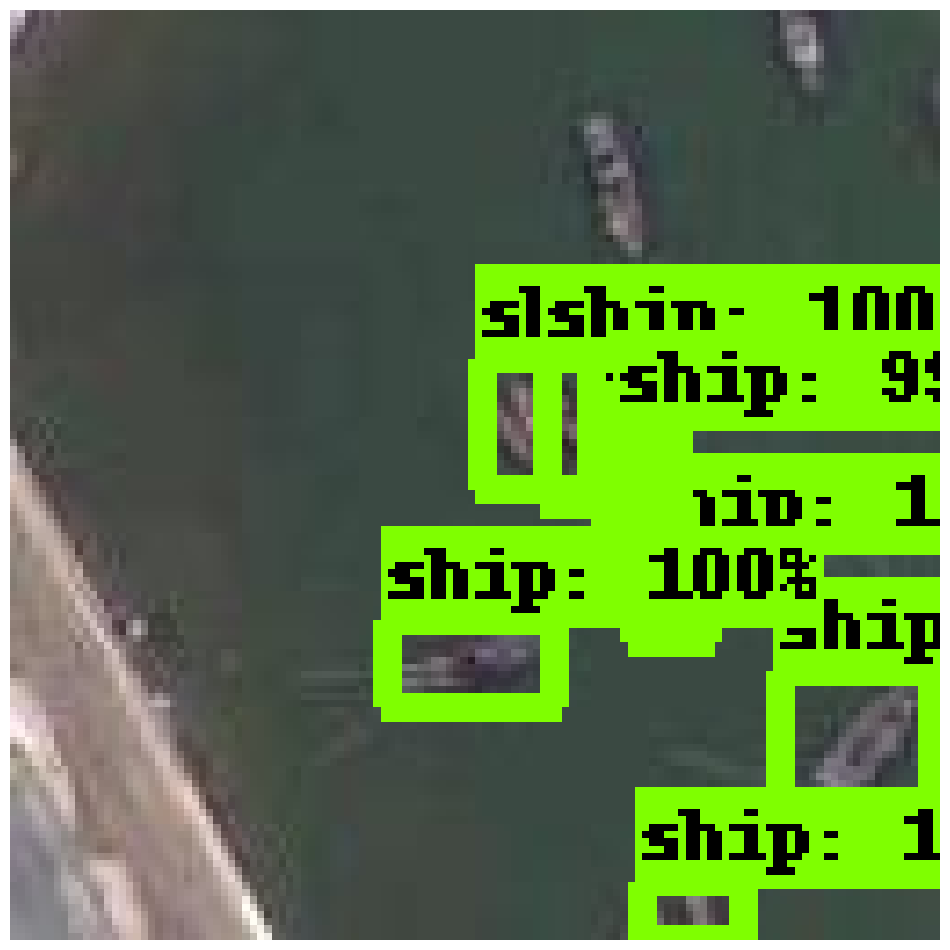

In [39]:
import cv2
#run detector on test image
#it takes a little longer on the first run and then runs at normal speed. 
TEST_IMAGE_PATHS = glob.glob('/home/skm/SKM16/IMAGE/ZZ_ZZ/TauBien/code/Try/SSD/maskrcnn/data/test/*.jpg')
image_path = random.choice(TEST_IMAGE_PATHS)
print(os.path.basename(image_path))
image_np = load_image_into_numpy_array(image_path)
# image_np = cv2.resize(image_np, dsize=None, fx=0.2, fy=0.2)

# Things to try:
# Flip horizontally
# image_np = np.fliplr(image_np).copy()

# Convert image to grayscale
# image_np = np.tile(
#     np.mean(image_np, 2, keepdims=True), (1, 1, 3)).astype(np.uint8)

input_tensor = tf.convert_to_tensor(
    np.expand_dims(image_np, 0), dtype=tf.float32)
detections, predictions_dict, shapes = detect_fn(input_tensor)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
      image_np_with_detections,
      detections['detection_boxes'][0].numpy(),
      (detections['detection_classes'][0].numpy() + label_id_offset).astype(int),
      detections['detection_scores'][0].numpy(),
      category_index,
      use_normalized_coordinates=True,
      max_boxes_to_draw=200,
      min_score_thresh=.8,
      agnostic_mode=False,
)

plt.figure(figsize=(12,16))
plt.imshow(image_np_with_detections)
plt.axis("off")
plt.show()

In [92]:
category_index

{1: {'id': 1, 'name': 'ship'}}